In [1]:
import numpy as np
import os
import soundfile as sf

import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

from pathlib import Path
import time

In [2]:
def subsample(percent_on, audio):

    time_on = percent_on*audio.shape[0]

    sub_audio = audio[:np.ceil(time_on).astype('int32')]

    return np.arange(time_on), sub_audio.astype('int16')

In [3]:
filepath = f"{Path.home()}/Documents/Research/Lab_related"

filename = "20210910_030000.WAV"

## Read audio .WAV file
fs, audio = wav.read(Path(f"{filepath}/{filename}"))
audio = audio[:600*fs]

s1, audio1 = subsample(1.0, audio)
s2, audio2 = subsample(0.75, audio)
s3, audio3 = subsample(0.5, audio)
s4, audio4 = subsample(0.25, audio)

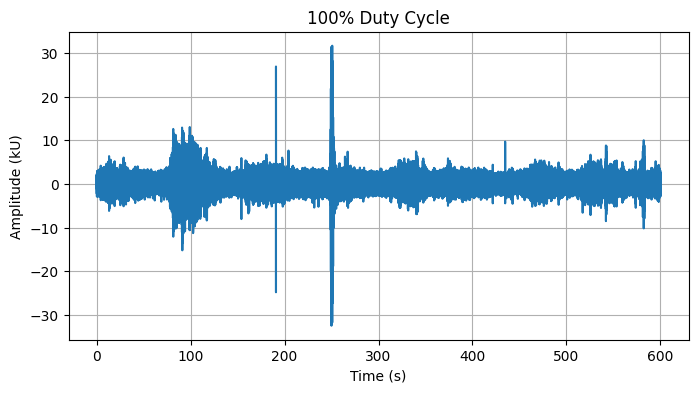

In [4]:
plt.figure(figsize=(8, 4))
plt.title("100% Duty Cycle")
plt.plot(s1/fs, audio1/1000)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

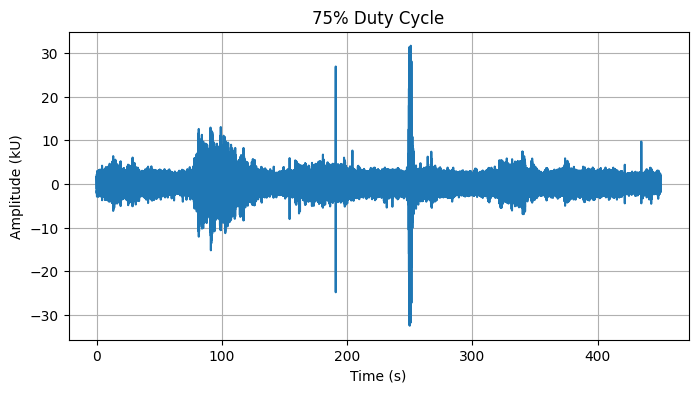

In [5]:
plt.figure(figsize=(8, 4))
plt.title("75% Duty Cycle")
plt.plot(s2/fs, audio2/1000)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

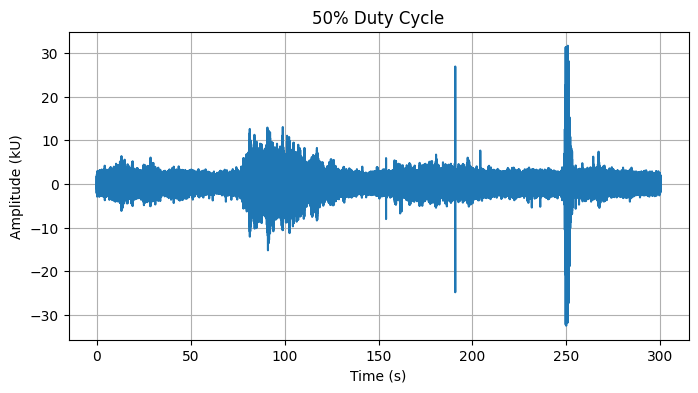

In [6]:
plt.figure(figsize=(8, 4))
plt.title("50% Duty Cycle")
plt.plot(s3/fs, audio3/1000)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

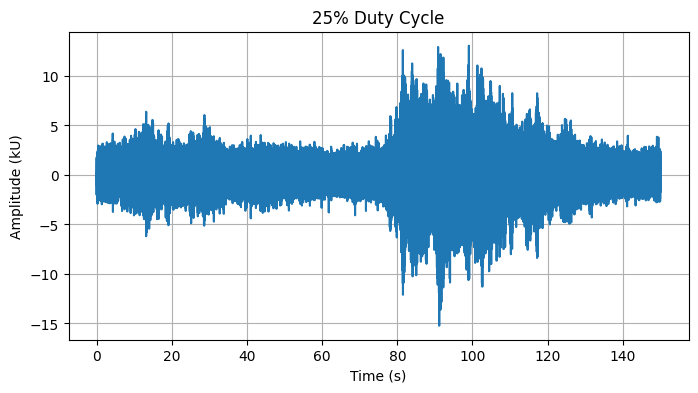

In [7]:
plt.figure(figsize=(8, 4))
plt.title("25% Duty Cycle")
plt.plot(s4/fs, audio4/1000)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

In [2]:
filepath = f"{Path.home()}/Documents/Research/Lab_related"

filename = "20210910_030000.WAV"

## Read audio .WAV file
fs, audio = wav.read(Path(f"{filepath}/{filename}"))

In [3]:
def subsample_frompath_withcyclelength(audio_filepath, output_dir, cycle_length, percent_on):

    audio = sf.SoundFile(audio_filepath)

    sr = audio.samplerate
    audio_length = audio.frames 
    frames_on = percent_on * (cycle_length * sr)
    sub_audio = np.array([])
    times = 0
    cur_pointer = 0
    
    while (cur_pointer < audio_length):
        times += 1
        cur_audio = audio.read(np.round(frames_on).astype('int32'), dtype='int16')
        cur_pointer = times * cycle_length * sr
        sub_audio = np.concatenate([sub_audio, cur_audio, np.zeros(np.round((cycle_length*sr) - frames_on).astype('int32'))])
        if (cur_pointer < audio_length - frames_on):
            audio.seek(cur_pointer)


    op_file = os.path.basename(audio_filepath.name).replace(" ", "_")
    op_file = f"{op_file[:-4]}__{(percent_on):.0%}DUTYCYCLE.WAV"

    sf.write(os.path.join(output_dir, op_file), sub_audio, sr, subtype='PCM_16') 

    return sr, sub_audio

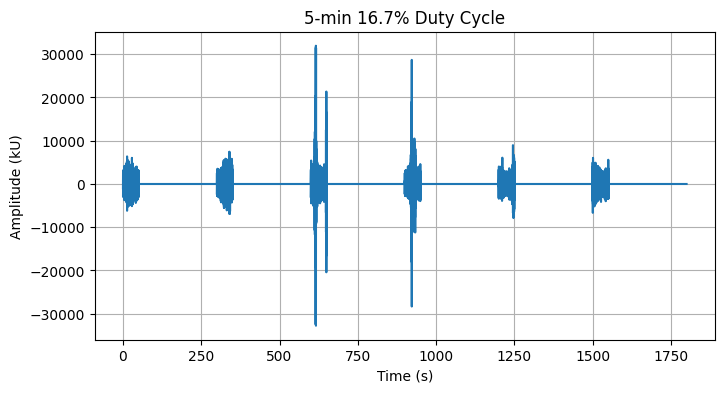

In [10]:
sr, audio = subsample_frompath_withcyclelength(audio_filepath = Path(f'{filepath}/{filename}'), output_dir = filepath, cycle_length = 300, percent_on=0.167)

plt.figure(figsize=(8, 4))
plt.title("5-min 16.7% Duty Cycle")
plt.plot(np.arange(0, sr*1800) / sr, audio)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

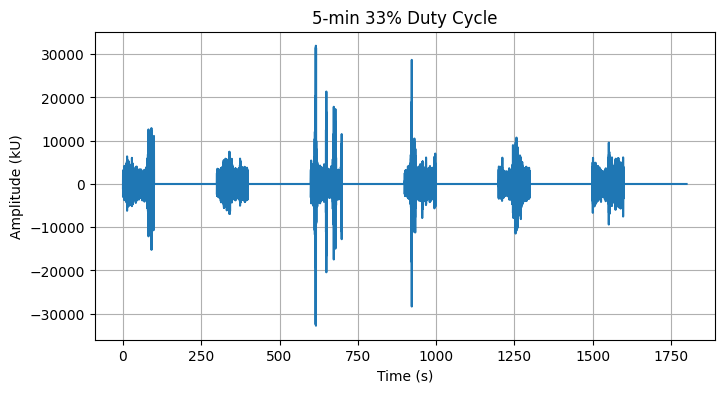

In [4]:
sr, audio = subsample_frompath_withcyclelength(audio_filepath = Path(f'{filepath}/{filename}'), output_dir = filepath, cycle_length = 300, percent_on=0.33)

plt.figure(figsize=(8, 4))
plt.title("5-min 33% Duty Cycle")
plt.plot(np.arange(0, sr*1800) / sr, audio)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

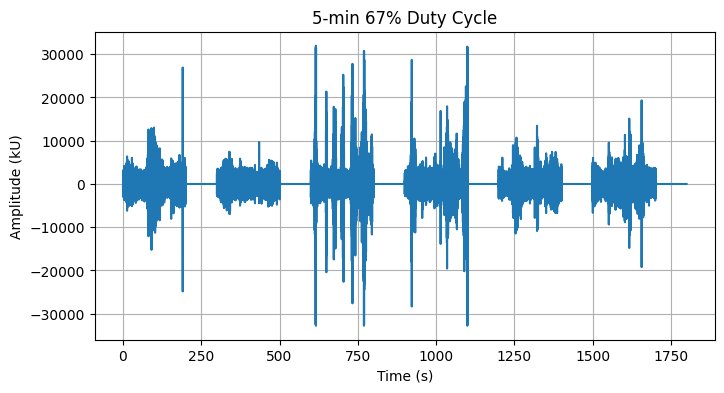

In [5]:
sr, audio = subsample_frompath_withcyclelength(audio_filepath = Path(f'{filepath}/{filename}'), output_dir = filepath, cycle_length = 300, percent_on=0.67)

plt.figure(figsize=(8, 4))
plt.title("5-min 67% Duty Cycle")
plt.plot(np.arange(0, sr*1800) / sr, audio)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

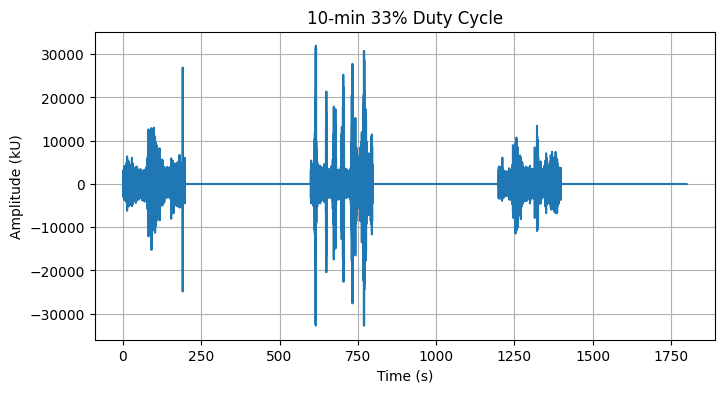

In [7]:
sr, audio = subsample_frompath_withcyclelength(audio_filepath = Path(f'{filepath}/{filename}'), output_dir = filepath, cycle_length = 600, percent_on=0.33)

plt.figure(figsize=(8, 4))
plt.title("10-min 33% Duty Cycle")
plt.plot(np.arange(0, sr*1800) / sr, audio)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()

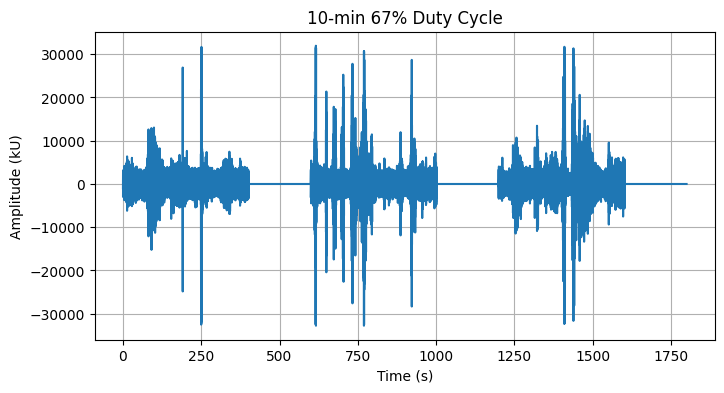

In [4]:
sr, audio = subsample_frompath_withcyclelength(audio_filepath = Path(f'{filepath}/{filename}'), output_dir = filepath, cycle_length = 600, percent_on=0.67)

plt.figure(figsize=(8, 4))
plt.title("10-min 67% Duty Cycle")
plt.plot(np.arange(0, sr*1800) / sr, audio)
plt.ylabel("Amplitude (kU)")
plt.xlabel("Time (s)")
plt.grid(which="both")
plt.show()